## Homework
> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.


In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip


--2024-10-14 22:13:42--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'bank+marketing.zip'

     0K .......... .......... .......... .......... ..........  175K
    50K .......... .......... .......... .......... ..........  313K
   100K .......... .......... .......... .......... ..........  276K
   150K .......... .......... .......... .......... ..........  349K
   200K .......... .......... .......... .......... ..........  281K
   250K .......... .......... .......... .......... ..........  180K
   300K .......... .......... .......... .......... ..........  318K
   350K .......... .......... .......... .......... ..........  160K
   400K .......... .......... .......... .......... ..........  266K
   450K .......... ..........

In [5]:
import pandas as pd

df = pd.read_csv('bank/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:

# 選擇指定的特徵
selected_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# 從原始數據框中選擇這些特徵
df_selected = df[selected_features]


In [7]:

# 檢查是否有缺失值
missing_values = df_selected.isnull().sum()

print("選擇的特徵:")
print(df_selected.columns.tolist())
print("\n缺失值統計:")
print(missing_values)

# 顯示處理後的數據框的前幾行
print("\n處理後的數據框前幾行:")
print(df_selected.head())




選擇的特徵:
['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

缺失值統計:
age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

處理後的數據框前幾行:
   age           job  marital  education  balance housing  contact  day month  \
0   58    management  married   tertiary     2143     yes  unknown    5   may   
1   44    technician   single  secondary       29     yes  unknown    5   may   
2   33  entrepreneur  married  secondary        2     yes  unknown    5   may   
3   47   blue-collar  married    unknown     1506     yes  unknown    5   may   
4   33       unknown   single    unknown        1      no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  
0       261         1     -1         0  unk


### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`
- `tertiary`


In [8]:
df['education'].mode()


0    secondary
Name: education, dtype: object

In [9]:
df['education'].value_counts()


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`


### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.


c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.c

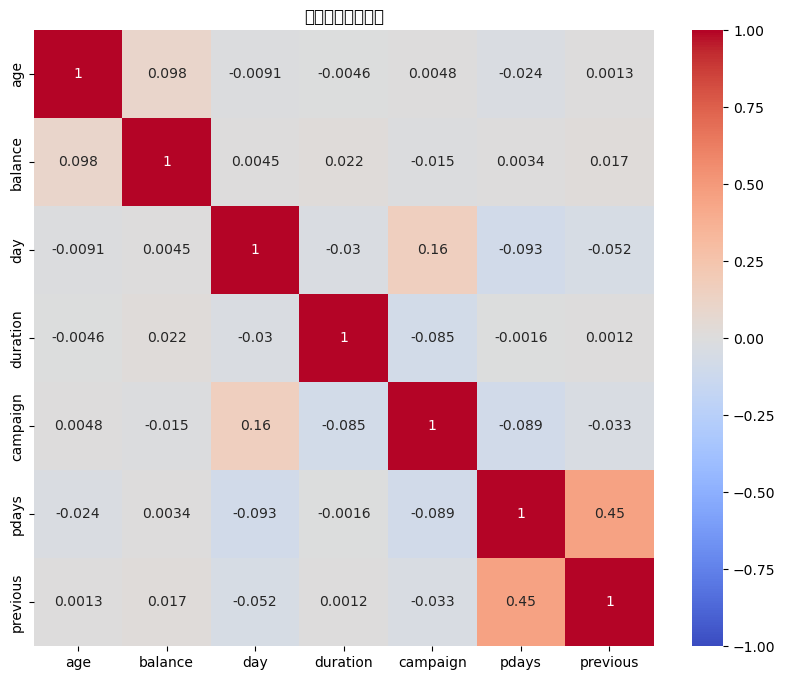

In [13]:
# 首先，我們需要導入必要的庫
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 選擇數值型特徵
numerical_features = df.select_dtypes(include=[np.number]).columns

# 計算相關矩陣
correlation_matrix = df[numerical_features].corr()

# 繪製相關矩陣熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('數值特徵相關矩陣')
plt.show()

# 找出相關性最大的兩個特徵
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
strongest_pair = sorted_pairs[sorted_pairs < 1].iloc[0]


In [16]:

# print(f"相關性最強的兩個特徵是: {strongest_pair.index[0]} 和 {strongest_pair.index[1]}")
print(f"它們的相關係數是: {strongest_pair:.2f}")


它們的相關係數是: 0.45


In [27]:
print(sorted_pairs[sorted_pairs < 1][:1])
# type(sorted_pairs)


previous  pdays    0.45482
dtype: float64


In [28]:

# 目標編碼
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# 分割數據
from sklearn.model_selection import train_test_split

# 分離特徵和目標變量
X = df.drop('y', axis=1)
y = df['y']

# 首先分割出測試集
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 然後從剩餘的數據中分割出驗證集
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("訓練集大小:", X_train.shape[0])
print("驗證集大小:", X_val.shape[0])
print("測試集大小:", X_test.shape[0])


訓練集大小: 27126
驗證集大小: 9042
測試集大小: 9043


In [ ]:

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`



In [30]:
# 導入所需的庫
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd

# 選擇分類變量
categorical_features = ['contact', 'education', 'housing', 'poutcome']
# 創建 OrdinalEncoder 實例
encoder = OrdinalEncoder()
# 對分類特徵進行編碼
X_train_encoded = X_train.copy()
X_train_encoded[categorical_features] = encoder.fit_transform(X_train[categorical_features])

# 計算互信息分數
mi_scores = mutual_info_classif(X_train_encoded[categorical_features], y_train)

# 將分數四捨五入到小數點後兩位
mi_scores_rounded = [round(score, 2) for score in mi_scores]

# 創建一個字典來存儲特徵和它們的分數
mi_dict = dict(zip(categorical_features, mi_scores_rounded))

# 按分數降序排序
sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)


print("互信息分數（降序排列）：")
for feature, score in sorted_mi:
    print(f"{feature}: {score}")

print("\n具有最大互信息分數的變量是：", sorted_mi[0][0])

# 解釋結果
print("\n解釋：")
print("1. 互信息分數衡量了每個分類變量與目標變量 'y' 之間的相關性。")
print("2. 分數越高，表示該特徵與目標變量之間的相關性越強。")
print("3. 根據結果，我們可以看出哪些特徵對預測結果最有影響。")
print("4. 這有助於我們理解哪些特徵在預測客戶是否會訂閱定期存款時最為重要。")

# 提示進一步學習
print("\n進一步學習：")
print("1. 嘗試計算其他特徵的互信息分數，包括數值型特徵。")
print("2. 研究其他特徵選擇方法，如卡方檢驗或相關係數分析。")
print("3. 考慮使用這些分數來選擇最相關的特徵，以簡化模型並可能提高其性能。")


互信息分數（降序排列）：
poutcome: 0.03
housing: 0.02
contact: 0.01
education: 0.0

具有最大互信息分數的變量是： poutcome

解釋：
1. 互信息分數衡量了每個分類變量與目標變量 'y' 之間的相關性。
2. 分數越高，表示該特徵與目標變量之間的相關性越強。
3. 根據結果，我們可以看出哪些特徵對預測結果最有影響。
4. 這有助於我們理解哪些特徵在預測客戶是否會訂閱定期存款時最為重要。

進一步學習：
1. 嘗試計算其他特徵的互信息分數，包括數值型特徵。
2. 研究其他特徵選擇方法，如卡方檢驗或相關係數分析。
3. 考慮使用這些分數來選擇最相關的特徵，以簡化模型並可能提高其性能。


In [ ]:

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9



In [33]:
# 導入必要的庫
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 假設我們已經有了資料集 df
# 如果沒有，請先載入資料集
# df = pd.read_csv('bank-full.csv', sep=';')

# 分離特徵和目標變數
X = df.drop('y', axis=1)
y = df['y']

# 將資料集分割為訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 識別類別型和數值型特徵
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# 創建預處理步驟
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 創建管道
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42))
])

# 訓練模型
pipeline.fit(X_train, y_train)

# 在驗證集上進行預測
y_pred = pipeline.predict(X_val)

# 計算準確度並四捨五入到小數點後兩位
accuracy = round(accuracy_score(y_val, y_pred), 2)

print(f"驗證集上的準確度: {accuracy}")

# 根據準確度選擇正確的答案
if accuracy == 0.6:
    print("答案: 0.6")
elif accuracy == 0.7:
    print("答案: 0.7")
elif accuracy == 0.8:
    print("答案: 0.8")
elif accuracy == 0.9:
    print("答案: 0.9")
else:
    print("準確度不符合給定的選項")


驗證集上的準確度: 0.9
答案: 0.9


In [ ]:

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.



In [37]:
from sklearn.preprocessing import StandardScaler
# 定義要測試的特徵列表
features_to_test = ['age', 'balance', 'marital', 'previous']

# 創建一個字典來存儲每個特徵的準確度差異
accuracy_differences = {}

# 訓練包含所有特徵的基準模型
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

pipeline.fit(X_train, y_train)
base_accuracy = accuracy_score(y_val, pipeline.predict(X_val))

print(f"基準模型的準確度: {base_accuracy:.3f}")


基準模型的準確度: 0.900


In [38]:

# 對每個特徵進行特徵消除
for feature in features_to_test:
    # 創建一個新的特徵列表，排除當前特徵
    current_features = [col for col in X.columns if col != feature]
    
    # 創建新的預處理器和管道
    current_preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])
    
    current_pipeline = Pipeline([
        ('preprocessor', current_preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', random_state=42))
    ])
    
    # 訓練模型並計算準確度
    current_pipeline.fit(X_train[current_features], y_train)
    current_accuracy = accuracy_score(y_val, current_pipeline.predict(X_val[current_features]))
    
    # 計算準確度差異
    accuracy_difference = base_accuracy - current_accuracy
    accuracy_differences[feature] = accuracy_difference
    
    print(f"排除 {feature} 後的準確度: {current_accuracy:.3f}, 差異: {accuracy_difference:.3f}")

# 找出差異最小的特徵
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)
print(f"\n差異最小的特徵是: {least_useful_feature}")
print(f"其準確度差異為: {accuracy_differences[least_useful_feature]:.3f}")


ValueError: A given column is not a column of the dataframe

In [39]:
from sklearn.preprocessing import StandardScaler

# 確保要測試的特徵都存在於數據框中
features_to_test = ['age', 'balance', 'marital', 'previous']
valid_features = [f for f in features_to_test if f in X.columns]

print("有效的特徵：", valid_features)

# 創建一個字典來存儲每個特徵的準確度差異
accuracy_differences = {}

# 訓練包含所有特徵的基準模型
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

pipeline.fit(X_train, y_train)
base_accuracy = accuracy_score(y_val, pipeline.predict(X_val))

print(f"基準模型的準確度: {base_accuracy:.3f}")

# 對每個有效特徵進行特徵消除
for feature in valid_features:
    # 創建一個新的特徵列表，排除當前特徵
    current_features = [col for col in X.columns if col != feature]
    
    # 創建新的預處理器和管道
    current_preprocessor = ColumnTransformer([
        ('num', StandardScaler(), [col for col in numeric_features if col != feature]),
        ('cat', OneHotEncoder(drop='first'), [col for col in categorical_features if col != feature])
    ])
    
    current_pipeline = Pipeline([
        ('preprocessor', current_preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', random_state=42))
    ])
    
    # 訓練模型並計算準確度
    current_pipeline.fit(X_train[current_features], y_train)
    current_accuracy = accuracy_score(y_val, current_pipeline.predict(X_val[current_features]))
    
    # 計算準確度差異
    accuracy_difference = base_accuracy - current_accuracy
    accuracy_differences[feature] = accuracy_difference
    
    print(f"排除 {feature} 後的準確度: {current_accuracy:.3f}, 差異: {accuracy_difference:.3f}")

# 找出差異最小的特徵
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)
print(f"\n差異最小的特徵是: {least_useful_feature}")
print(f"其準確度差異為: {accuracy_differences[least_useful_feature]:.3f}")

有效的特徵： ['age', 'balance', 'marital', 'previous']
基準模型的準確度: 0.900
排除 age 後的準確度: 0.899, 差異: 0.001
排除 balance 後的準確度: 0.899, 差異: 0.001
排除 marital 後的準確度: 0.900, 差異: 0.000
排除 previous 後的準確度: 0.899, 差異: 0.001

差異最小的特徵是: marital
其準確度差異為: 0.000


In [ ]:

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100


In [41]:
# 定義要測試的 C 值
C_values = [0.01, 0.1, 1, 10, 100]

# 初始化一個字典來存儲每個 C 值對應的準確度
accuracies = {}

# 使用所有特徵
all_features = X_train.columns.tolist()

# 創建預處理器
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# 對每個 C 值訓練模型並計算準確度
for C in C_values:
    # 創建管道
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', random_state=42, C=C))
    ])
    
    # 訓練模型
    pipeline.fit(X_train[all_features], y_train)
    
    # 在驗證集上計算準確度
    accuracy = accuracy_score(y_val, pipeline.predict(X_val[all_features]))
    accuracies[C] = round(accuracy, 3)
    
    print(f"C = {C}: 準確度 = {accuracies[C]:.3f}")

# 找出最佳的 C 值
best_C = max(accuracies, key=accuracies.get)
print(f"\n最佳的 C 值是: {best_C}")
print(f"對應的準確度是: {accuracies[best_C]:.3f}")

# 如果有多個 C 值達到最高準確度，選擇最小的 C
if list(accuracies.values()).count(accuracies[best_C]) > 1:
    best_C = min([C for C in C_values if accuracies[C] == accuracies[best_C]])
    print(f"\n注意：有多個 C 值達到最高準確度。選擇最小的 C: {best_C}")


C = 0.01: 準確度 = 0.897
C = 0.1: 準確度 = 0.899
C = 1: 準確度 = 0.899
C = 10: 準確度 = 0.899
C = 100: 準確度 = 0.899

最佳的 C 值是: 0.1
對應的準確度是: 0.899

注意：有多個 C 值達到最高準確度。選擇最小的 C: 0.1



> **Note**: If there are multiple options, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one